In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [27]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [28]:
n = df['Age'].isnull().sum()    # no. of null values in Age
n

177

In [29]:
df['Age'].dropna().sample(n,random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [30]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

# main

In [31]:
df["random_"+"Age"] = df['Age']   #Creating new feature "random_Age"
df

,Survived,Age,Fare,random_Age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,NaN
889,1,26.0,30.0000,26.0


In [32]:
random_sample = df['Age'].dropna().sample(n,random_state=0)  #Taking random Sample from Age
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [33]:
random_sample.index = df[df['Age'].isnull()].index # assigning the indexes to random sample according to dataset
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

## As the indexes of Age and random_sample are same , Now put the data of random_sample in random_Age feature 

In [10]:
df['random_Age']= random_sample
df

,Survived,Age,Fare,random_Age
0,0,22.0,7.2500,NaN
1,1,38.0,71.2833,NaN
2,1,26.0,7.9250,NaN
3,1,35.0,53.1000,NaN
4,0,35.0,8.0500,NaN
...,...,...,...,...
886,0,27.0,13.0000,NaN
887,1,19.0,30.0000,NaN
888,0,NaN,23.4500,15.0
889,1,26.0,30.0000,NaN


## As we can see the NaN values of random_sample are also copied in the random_Age feature which is a blunder, so we use the method used below:

In [34]:
df.loc[df['Age'].isnull(),'random_Age']=random_sample # This code of line merges the data of random_Age and random_sample
df

,Survived,Age,Fare,random_Age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,15.0
889,1,26.0,30.0000,26.0


# All above Commands can be comprised in a function as shown below:

In [36]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]  # Creating the feature
    
    ##It will have the random sample to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index  # setting indexes
    df.loc[df[variable].isnull(),variable+'_random']=random_sample # merging data

# Age  vs random_Age plot

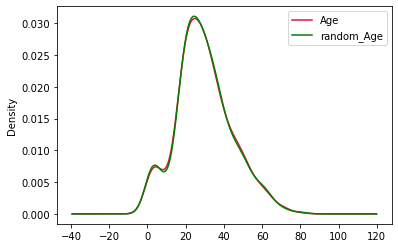

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax, color= 'crimson')
df.random_Age.plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# As we can see, There is very less difference between Age(with nan-values) and random_Age(with all filled values)

## Advantages of random imputation:
1. Easy To implement
2. There is less distortion in variance

## Disadvantage of random imputation:
1. Every situation randomness wont work